<a href="https://colab.research.google.com/github/SKD151105/Colab-Notes/blob/main/ML_project_Densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubham2703/five-crop-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/five-crop-diseases-dataset


In [ ]:
#/root/.cache/kagglehub/datasets/shubham2703/five-crop-diseases-dataset/versions/1/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice

#/root/.cache/kagglehub/datasets/shubham2703/five-crop-diseases-dataset/versions/1/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Brown_Spot

#/root/.cache/kagglehub/datasets/shubham2703/five-crop-diseases-dataset/versions/1/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Healthy

#/root/.cache/kagglehub/datasets/shubham2703/five-crop-diseases-dataset/versions/1/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast

#/root/.cache/kagglehub/datasets/shubham2703/five-crop-diseases-dataset/versions/1/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Neck_Blast

#/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
imgsize=256
batchsize=32
path='/kaggle/input/five-crop-diseases-dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice'
dataset = tf.keras.preprocessing.image_dataset_from_directory(path,
                                                              shuffle=True,image_size=(imgsize,imgsize),batch_size=batchsize)
#assigns labels as in encoded classes

Found 4078 files belonging to 4 classes.


In [ ]:
print(dataset.class_names)
print(len(dataset))

['Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Leaf_Blast', 'Rice___Neck_Blast']
128


In [ ]:
for images, labels in dataset.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 256, 256, 3)
[3 1 3 3 1 3 0 2 2 1 0 2 1 1 1 3 1 1 0 1 0 3 2 1 1 3 1 1 2 2 1 2]


In [ ]:
size = len(dataset)
train_split=0.8
test_split=0.1
val_split=0.1

train_size = int(train_split *size)
val_size = int(val_split *size)
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size).skip(val_size)

In [ ]:
from tensorflow.keras.applications import (
    ResNet50, InceptionV3,DenseNet121
)
#possible models to explore

In [ ]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,  # we’ll add our own classification head
    input_shape=(256, 256, 3)
)

total_classes = len(dataset.class_names)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(total_classes, activation='softmax')
])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=4,  # before : 3
    restore_best_weights=True
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',  #loss function for integer labels
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.4,  # before : 0.5
    patience=2,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr]
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.5035 - loss: 1.3050 - val_accuracy: 0.6615 - val_loss: 0.7423 - learning_rate: 1.0000e-04
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7010 - loss: 0.7836 - val_accuracy: 0.7552 - val_loss: 0.6351 - learning_rate: 1.0000e-04
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8030 - loss: 0.5595 - val_accuracy: 0.7370 - val_loss: 0.6855 - learning_rate: 1.0000e-04
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8480 - loss: 0.4493 - val_accuracy: 0.8594 - val_loss: 0.3841 - learning_rate: 1.0000e-04
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8623 - loss: 0.4051 - val_accuracy: 0.8490 - val_loss: 0.3780 - learning_rate: 1.0000e-04
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8713 - loss: 0.3464 - val_accuracy: 0.8906 - val_loss: 0.2881 - learning_rate: 1.0000e-04
Epoch 7

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test accuracy:", test_acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 48s 513ms/step - accuracy: 0.9054 - loss: 0.2691
Test accuracy: 0.9139534831047058


In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Accuracy Comparison:\n")
print(f"Train Accuracy     : {(final_train_acc * 100):.4f}")
print(f"Validation Accuracy: {(final_val_acc * 100):.4f}")
print(f"Test Accuracy      : {(test_acc * 100):.4f}")

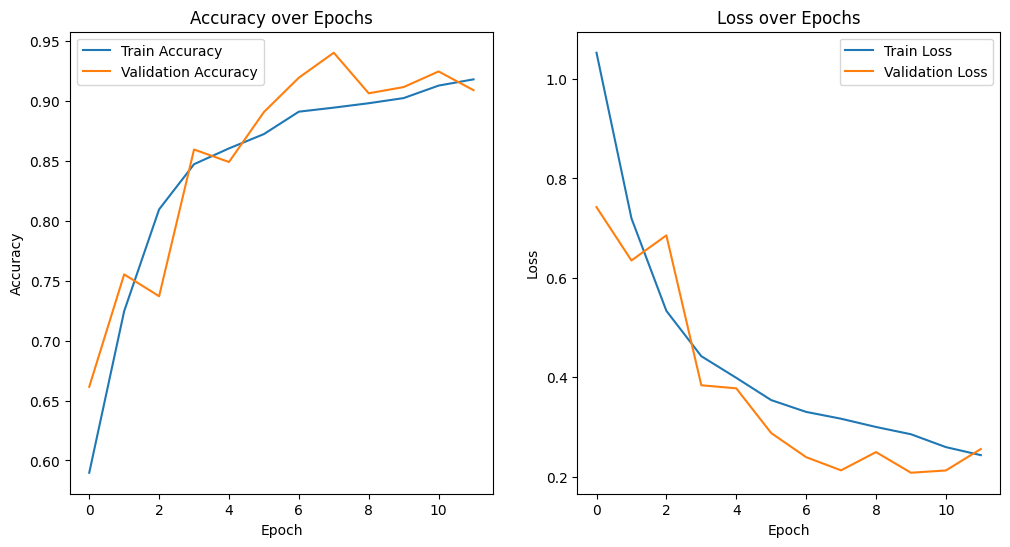

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()